<a href="https://colab.research.google.com/github/ItsMeAbby/DL-Workshop-1/blob/master/classify_on_your_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ItsMeAbby/DL-Workshop-1.git

Cloning into 'DL-Workshop-1'...
remote: Enumerating objects: 591, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 591 (delta 1), reused 0 (delta 0), pack-reused 484
Receiving objects: 100% (591/591), 155.34 MiB | 32.67 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 
     |████████████████████████████████| 189 kB 43.5 MB/s 
     |████████████████████████████████| 1.2 MB 34.3 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 313 kB/s 
Mounted at /content/gdrive


In [7]:
from fastai.vision.all import *
path = '/content/DL-Workshop-1/birdsVSfish'

def is_Bird(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_Bird, item_tfms=Resize(316))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,1.021872,1.900032,0.600000,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.361863,1.242546,0.550000,00:10
1,1.133733,0.706830,0.450000,00:10
2,0.976560,0.365940,0.200000,00:10
3,0.853859,0.252795,0.100000,00:10
4,0.685259,0.199008,0.050000,00:10
5,0.575847,0.194527,0.050000,00:10
6,0.500804,0.188759,0.050000,00:11


In [11]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

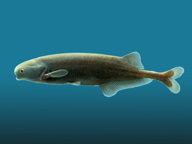

In [9]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [10]:
is_Bird,_,probs = learn.predict(img)
print(f"Is this a Bird?: {is_Bird}.")
print(f"Probability it's a Bird: {probs[1].item():.6f}")

Is this a Bird?: False.
Probability it's a Bird: 0.000498
